##### Dataset

In [41]:
# Social_Network_Ads.csv
# https://mitu.co.in/dataset

##### Import the libraries

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

##### Load the dataset

In [43]:
df = pd.read_csv('datasets/Social_Network_Ads.csv')

In [44]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0
...,...,...,...,...,...
395,15691863,Female,46.0,41000.0,1
396,15706071,Male,51.0,23000.0,1
397,15654296,Female,50.0,20000.0,1
398,15755018,Male,36.0,33000.0,0


##### Separate the input and output variables

In [45]:
# input data
x = df[['Age','EstimatedSalary']]

# output data
y = df['Purchased']

##### Explore the data

In [46]:
x.describe()

,Age,EstimatedSalary
count,400.000000,400.000000
mean,37.655000,69742.500000
std,10.482877,34096.960282
min,18.000000,15000.000000
25%,29.750000,43000.000000
50%,37.000000,70000.000000
75%,46.000000,88000.000000
max,60.000000,150000.000000


In [47]:
set(y)

{0, 1}

In [48]:
print(np.unique(y))

[0 1]


In [49]:
y.value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

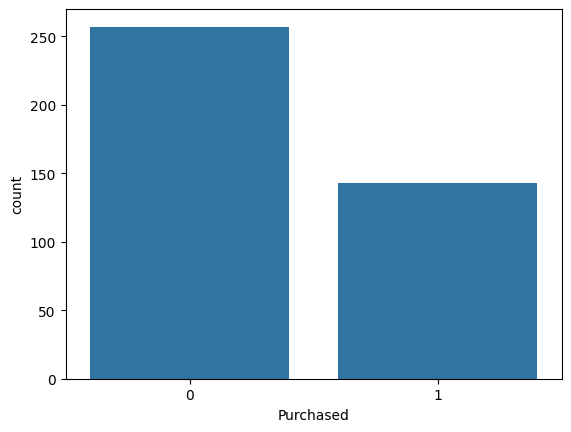

In [50]:
sns.countplot(x = y);

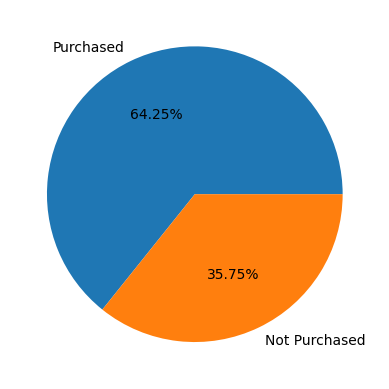

In [51]:
plt.pie(y.value_counts(), labels=['Purchased','Not Purchased'], autopct='%2.2f%%');

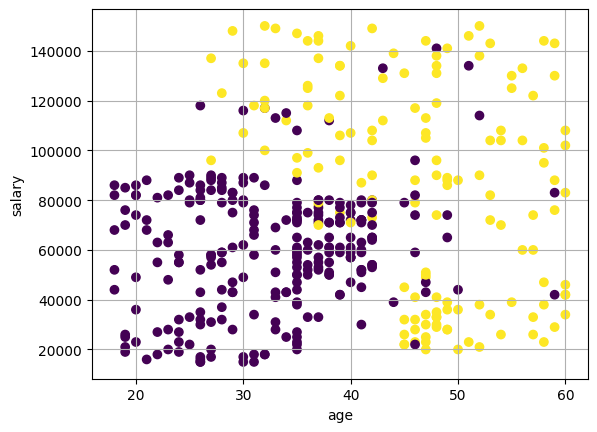

In [52]:
plt.xlabel('age')
plt.ylabel('salary')
plt.grid()
plt.scatter(x['Age'], x['EstimatedSalary'], c=  y);

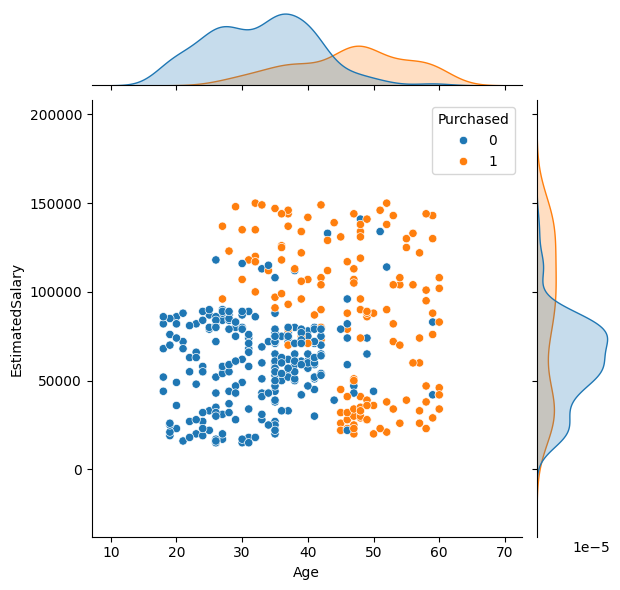

In [53]:
sns.jointplot(x = 'Age', y = 'EstimatedSalary', hue = 'Purchased', data = df);

In [66]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

##### Cross-Validation

In [54]:
from sklearn.model_selection import train_test_split

In [67]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, random_state=0)

In [68]:
x_train.shape

(300, 2)

In [69]:
x_test.shape

(100, 2)

##### Build the model

In [70]:
# import the class
from sklearn.linear_model import LogisticRegression

In [71]:
# create the object
classifier = LogisticRegression()

In [72]:
# train the algorithm
classifier.fit(x_train, y_train)

LogisticRegression()

##### Perfomance Evaluation

In [73]:
y_pred = classifier.predict(x_test)

In [74]:
y_test.values

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1])

In [75]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1])

In [64]:
import sklearn

In [65]:
sklearn.__version__

'1.3.2'

In [76]:
result = pd.DataFrame({
    'actual': y_test,
    'predicted': y_pred
})

In [77]:
result

,actual,predicted
132,0,0
309,0,0
341,0,0
196,0,0
246,0,0
...,...,...
146,1,0
135,0,0
390,1,0
264,1,1


In [78]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import classification_report, accuracy_score

In [79]:
confusion_matrix(y_test, y_pred)

array([[65,  3],
       [ 8, 24]])

In [80]:
y_test.value_counts()

Purchased
0    68
1    32
Name: count, dtype: int64

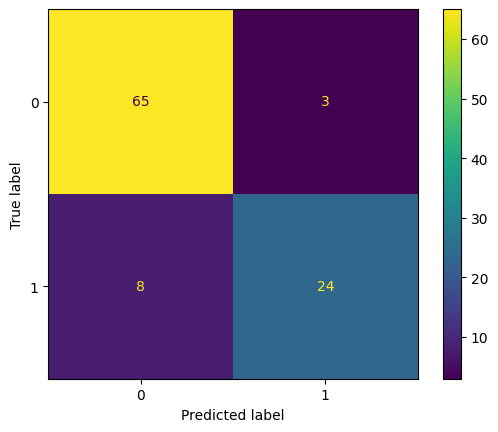

In [81]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [82]:
accuracy_score(y_test, y_pred)

0.89

In [83]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92        68
           1       0.89      0.75      0.81        32

    accuracy                           0.89       100
   macro avg       0.89      0.85      0.87       100
weighted avg       0.89      0.89      0.89       100



In [84]:
# recall - individual class accuracy
r0 = 65 / 68
r0

0.9558823529411765

In [85]:
# recall - individual class accuracy
r1 = 24 / 32
r1

0.75

In [86]:
# Precision - True Positive Rate
p0 = 65 / 73
p0

0.8904109589041096

In [87]:
# Precision - False Positive Rate
p1 = 24 / 27
p1

0.8888888888888888

In [88]:
f0 = 2 * (p0 * r0) / (p0 + r0)
f0

0.9219858156028369

In [89]:
f1 = 2 * (p1 * r1) / (p1 + r1)
f1

0.8135593220338982

##### Prediction on unseen data

In [92]:
newdf = pd.DataFrame({
    'Age': [31, 38, 55 ],
    'EstimatedSalary': [60000, 125000, 90000]
})

In [93]:
newdf

,Age,EstimatedSalary
0,31,60000
1,38,125000
2,55,90000


In [95]:
classifier.predict(scaler.transform(newdf))

array([0, 1, 1])

In [96]:
classifier.predict_proba(scaler.transform(newdf))

array([[0.93801125, 0.06198875],
       [0.30913978, 0.69086022],
       [0.04069048, 0.95930952]])

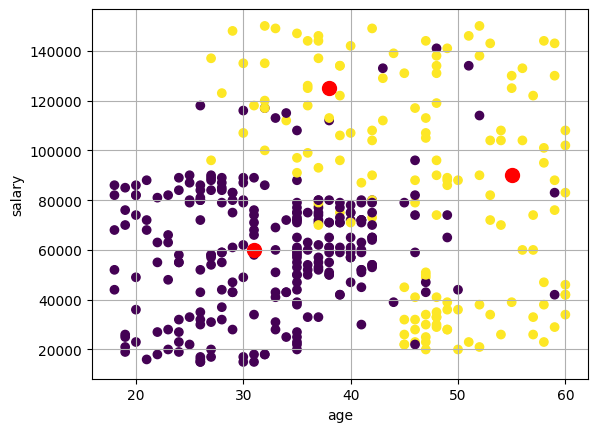

In [97]:
plt.xlabel('age')
plt.ylabel('salary')
plt.grid()
plt.scatter(x['Age'], x['EstimatedSalary'], c=  y);
plt.scatter(newdf['Age'], newdf['EstimatedSalary'], color='r', s = 100);